# Welcome to Statistics Project-2

Dear Participant,

Please find the below details for Statistics Project-2.

About Data –

In 2013, students of the Statistics class at FSEV UK were asked to invite their friends to participate in this survey.

The data file (responses.csv) consists of 1010 rows and 150 columns (139 integers and 11 categorical).

dataset - responses.csvView in a new window

For convenience, the original variable names were shortened in the data file.

See the columns.csv file if you want to match the data with the original names.

* The data contain missing values.
* The survey was presented to participants in both electronic and written form.
* The original questionnaire was in Slovak language and was later translated into English.
* All participants were of Slovakian nationality, aged between 15-30.

For this Project we are considering 2 sections of data –  __Health Habits and Spending Habits__

* Health Habits - I live a very healthy lifestyle. 
  - Here Strongly disagree 1-2-3-4-5 Strongly agree
* Spending Habits - I save all the money I can.
  - Strongly disagree 1-2-3-4-5 Strongly agree
 

__The Agenda is to find whether Spending Habits and Healthy Lifestyle is related to Gender and Place or not.__

Steps –

* Load the data and extract the relevant columns. Hint – Relevant Columns will be 
  - Finances
  - Gender
  - Village-Town
  - Healthy Eating
* Explore the data and understand how the data is distributed? Is there any outlier or missing value? And Share your insights.
* Create Hypothesis on the following questions –
  - Is saving money (finances) gender dependant?
  - Is there any differences in money saving (finances) between people from city or village?
  - Do Women have a Healthier Lifestyle than Men?
  - Are Village People Healthier than City People?
* Perform the required statistical tests to validate/reject the Hypothesis in above step.
* State your insights and conclusions.


Please Note:

__Total marks__ allotted for this assignment is __35__.

In [278]:
# Import necessary Python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
import scipy

In [279]:
# Load the data
survey = pd.read_csv("responses.csv", dtype = {"Gender" : "category", 
                                               "Village - town" : "category"
                                              })

# Check the shape of given dataset
print("Shape of Dataset -- ", survey.shape)

Shape of Dataset --  (1010, 150)


In [280]:
# So we have 1010 rows and 150 columns

# Now let's grab the relevant columns for our analysis

data = survey[["Finances", "Gender", "Village - town", "Healthy eating"]]

data.shape

(1010, 4)

In [281]:
# Generate descriptive statistics that summarize the central tendency,
# dispersion and shape of a dataset's distribution, excluding
# ``NaN`` values.
data.describe(include='all')

,Finances,Gender,Village - town,Healthy eating
count,1007.000000,1004,1006,1007.000000
unique,NaN,2,2,NaN
top,NaN,female,city,NaN
freq,NaN,593,707,NaN
mean,3.023833,NaN,NaN,3.031778
std,1.144365,NaN,NaN,0.936865
min,1.000000,NaN,NaN,1.000000
25%,2.000000,NaN,NaN,3.000000
50%,3.000000,NaN,NaN,3.000000
75%,4.000000,NaN,NaN,4.000000


In [282]:
# Count number of missing values
missing_cnt = lambda col : print("Missing values in {} column = {}".format(col, sum(data[col].isna().ravel())))

missing_cnt("Finances")
missing_cnt("Gender")
missing_cnt("Village - town")
missing_cnt("Healthy eating")

Missing values in Finances column = 3
Missing values in Gender column = 6
Missing values in Village - town column = 4
Missing values in Healthy eating column = 3


In [320]:
print(data["Finances"].value_counts(normalize=True))
print(data["Healthy eating"].value_counts(normalize=True))
print(data["Gender"].value_counts(normalize=True))
print(data["Village - town"].value_counts(normalize=True))

print("")

print("For 'Finances' column, 35.55% values are set to 3 (Median value) and for 'Healthy eating' column 50.04% values are set to 3 (Median value). \
Hence setting the missing values in these columns to 3")
print("")
print("For 'Gender' column, 59.30% values are set to 'female' and for 'Village - town' column 70.39% values are set to 'city'. \
Hence setting the missing values in these columns 'female' & 'city' respectively.")

data = data.fillna(data.median()["Finances":"Healthy eating"])
data = data.fillna(pd.Series(data = ["female", "city"], index = ["Gender", "Village - town"]))

3.0    0.357426
4.0    0.249505
2.0    0.172277
1.0    0.123762
5.0    0.097030
Name: Finances, dtype: float64
3.0    0.501980
4.0    0.236634
2.0    0.135644
1.0    0.080198
5.0    0.045545
Name: Healthy eating, dtype: float64
female    0.593069
male      0.406931
Name: Gender, dtype: float64
city       0.70396
village    0.29604
Name: Village - town, dtype: float64

For 'Finances' column, 35.55% values are set to 3 (Median value) and for 'Healthy eating' column 50.04% values are set to 3 (Median value). Hence setting the missing values in these columns to 3

For 'Gender' column, 59.30% values are set to 'female' and for 'Village - town' column 70.39% values are set to 'city'. Hence setting the missing values in these columns 'female' & 'city' respectively.


In [284]:
data.describe(include="all")

,Finances,Gender,Village - town,Healthy eating
count,1010.000000,1010,1010,1010.000000
unique,NaN,2,2,NaN
top,NaN,female,city,NaN
freq,NaN,599,711,NaN
mean,3.023762,NaN,NaN,3.031683
std,1.142663,NaN,NaN,0.935473
min,1.000000,NaN,NaN,1.000000
25%,2.000000,NaN,NaN,3.000000
50%,3.000000,NaN,NaN,3.000000
75%,4.000000,NaN,NaN,4.000000


In [304]:
print("Value Count for 'Finances' :")
print(data["Finances"].value_counts())
print("")
print("Value Count for 'Healthy eating' :")
print(data["Healthy eating"].value_counts(normalize=True))

Value Count for 'Finances' :
3.0    361
4.0    252
2.0    174
1.0    125
5.0     98
Name: Finances, dtype: int64

Value Count for 'Healthy eating' :
3.0    0.501980
4.0    0.236634
2.0    0.135644
1.0    0.080198
5.0    0.045545
Name: Healthy eating, dtype: float64


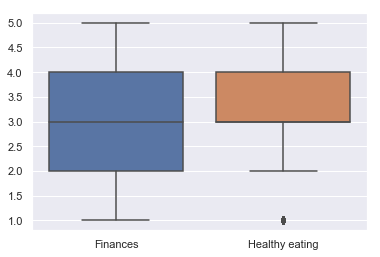

In [305]:
# Let's do some visualizations
sns.boxplot(data=data)

# Healthy eating- With 25% and 50% (Median) centered around Value-3, Value - 1 in Healthy eating is clearly an outlier. 
# Which means compared to overall population, there are very less people that less healthy lifestyle.

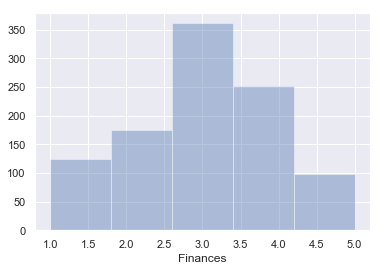

In [290]:
sns.distplot(data["Finances"], bins=5, kde=False)

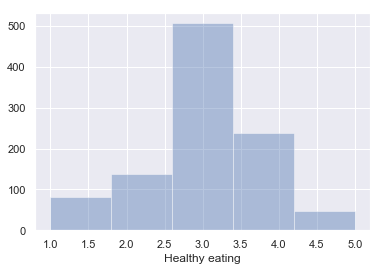

In [274]:
sns.distplot(data["Healthy eating"], bins=5, kde=False)

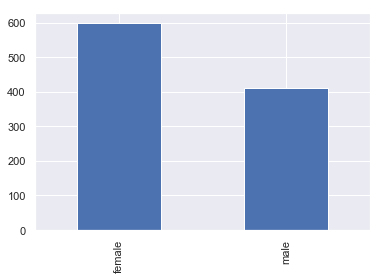

In [296]:
data["Gender"].value_counts().plot(kind="bar")
# More female participated in survey than male

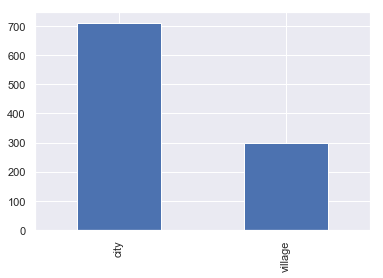

In [297]:
data["Village - town"].value_counts().plot(kind="bar")
# More people from city participated in survey than village

3.0    0.357426
4.0    0.249505
2.0    0.172277
1.0    0.123762
5.0    0.097030
Name: Finances, dtype: float64


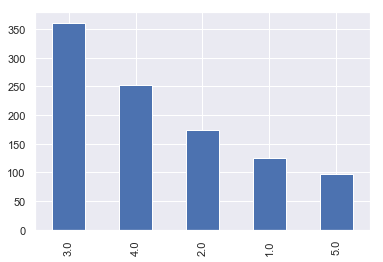

In [309]:
print(data["Finances"].value_counts(normalize=True))
data["Finances"].value_counts().plot(kind="bar")

# There are more people (35%) with rating 3 which means one third of population would neither try to save all the money that they can
# nor they use all the money that they have.

# Infact the next highest bar is with rating 4 (~25%), which means one fourth of population would 
# save a very decent amount of the money that they can.

3.0    0.501980
4.0    0.236634
2.0    0.135644
1.0    0.080198
5.0    0.045545
Name: Healthy eating, dtype: float64


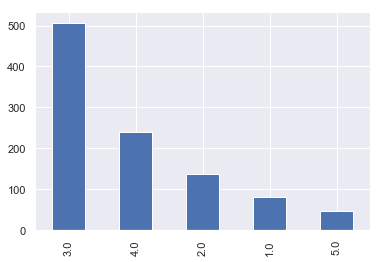

In [312]:
print(data["Healthy eating"].value_counts(normalize=True))
data["Healthy eating"].value_counts().plot(kind="bar")

# Half of the population (50%) neither live very healthy lifestyle nor very unhealthy lifestyle.
# Only 4.5 % of the population would live very healthy lifestyle whereas 8% live very unhealthy lifestyle.

Finances  1.0  2.0  3.0  4.0  5.0
Gender                           
female     65   98  223  150   63
male       60   76  138  102   35


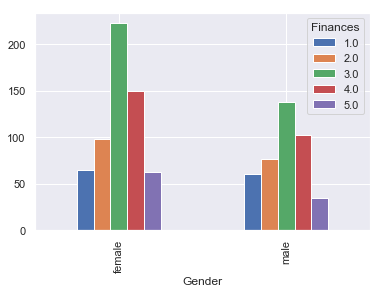

In [315]:
# Some important Cross tabs

# Cross tab to check how many male/female handle their finances
print(pd.crosstab(data["Gender"], data["Finances"]))
pd.crosstab(data["Gender"], data["Finances"]).plot(kind="bar")

# Since rating 3, 4, 5 bars are higher for female, it appears that female handle their finances better than male

Finances        1.0  2.0  3.0  4.0  5.0
Village - town                         
city             88  133  265  168   57
village          37   41   96   84   41


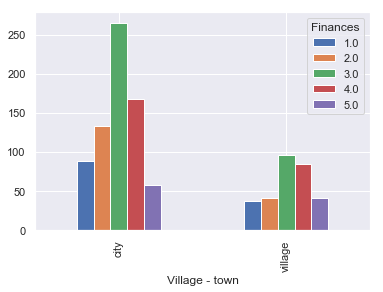

In [317]:
print(pd.crosstab(data["Village - town"], data["Finances"]))
pd.crosstab(data["Village - town"], data["Finances"]).plot(kind="bar")

Healthy eating  1.0  2.0  3.0  4.0  5.0
Gender                                 
female           36   67  329  147   20
male             45   70  178   92   26


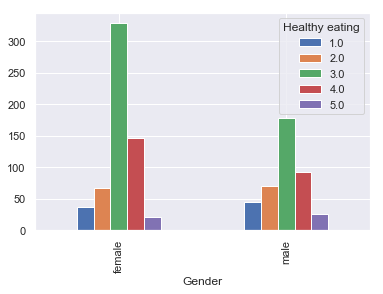

In [318]:
print(pd.crosstab(data["Gender"], data["Healthy eating"]))
pd.crosstab(data["Gender"], data["Healthy eating"]).plot(kind="bar")

Healthy eating  1.0  2.0  3.0  4.0  5.0
Village - town                         
city             58   88  356  177   32
village          23   49  151   62   14


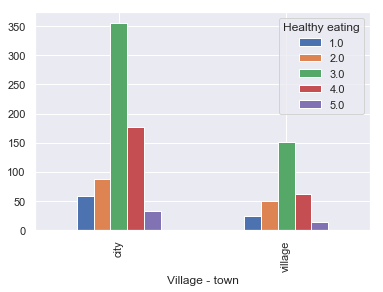

In [321]:
print(pd.crosstab(data["Village - town"], data["Healthy eating"]))
pd.crosstab(data["Village - town"], data["Healthy eating"]).plot(kind="bar")

# Since rating 3, 4, 5 bars are higher for city, it appears that city people live healthier lifestyle than village people

## 2.0 Create Hypothesis on the following questions

### 2.1 - Is saving money (finances) gender dependant?

